Pneumonia is a common infection that causes inflammation and possible fluid accumulation in the air sacs of the lungs.


[In China, pneumonia is one of the leading causes of death for children under 5 years old](https://journals.lww.com/md-journal/Fulltext/2018/11160/The_drug_use_to_treat_community_acquired_pneumonia.42.aspx#:~:text=More%20than%202%20million%200,the%20age%20of%205%20years.)


Causes of pneumonia include bactria, virus and fungal sources. 

[Pediatric pneumonia is generally diagnosed based on the time of the year and the results of a physical exam, paying attention the child's breathing and listening to the lungs](https://www.nationwidechildrens.org/conditions/pneumonia). Further testing can include blood tests and chest X-rays. 


Even with modern medicine, pneumonia can be misdiagnosed. A fast and accurate diagnosis allow doctors to treat the infection with the appropirate care. 


One application of machine learning in medicine is digital diagnosis. 


We have been tasked with developing an identification model to determine if a chest X-ray indicates the presence of pneumonia. False negative results are to be minimized compared to false positives.


The data is sourced from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). It is already split into three folders for training, validation and testing. All the chest radiographs were screened for quality and diagnostic labeling performed by physicians. The images were collected during routine clinicial care of pediatric patients between one and five years old from Guangzhou Women and Children's Medical Center in Guangzhou, China.

In [79]:
from os import listdir
from os.path import isfile, join

import numpy as np
from PIL import Image

In [78]:
# set paths, get file list for all files in train, val and test

train_normal_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/train/NORMAL'
train_normal_filelist = list(listdir(train_normal_path))

train_pnemonia_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/train/PNEUMONIA'
train_pnemonia_filelist = list(listdir(train_pnemonia_path))

val_normal_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/val/NORMAL'
val_normal_filelist = list(listdir(train_normal_path))

val_pnemonia_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/val/PNEUMONIA'
val_pnemonia_filelist = list(listdir(train_pnemonia_path))

test_normal_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/test/NORMAL'
train_normal_filelist = list(listdir(test_normal_path))

test_pnemonia_path = r'C:/Users/brtra/My Drive/Flatiron/phase_4/phase_4_project/chest_xray/test/PNEUMONIA'
test_pnemonia_filelist = list(listdir(test_pnemonia_path))

In [39]:
sample_image = Image.open(train_normal_path + r'/' + train_normal_filelist[0])

In [40]:
sample_image_array = np.asarray(sample_image)

In [74]:
sample_image_array.shape

(1858, 2090)

In [63]:
def resize_with_ratio(image, min_size=256):
    """
    This function will take in an image and resize it, maintaining aspect ratio.
    The default minimum length for a side is 256 pixels.
    The function will output a resized image with the smaller side sized to 256 pixels
    and the other side resized proportionately.
    
    """
    # get width and height from passed image   
    width, height = image.size
    
    # based on longer side changing to 256 pixels, calculate the ratio and length of
    # the shorter side
    if width>height:
        ratio_wh = width / height
        new_width = int(ratio_wh * min_size)
        new_height = min_size
    else:
        ratio_hw = height / width
        new_width = min_size
        new_height = int(ratio_hw * min_size)

    return image.resize((new_width, new_height))

In [64]:
sample_image_resized = resize_with_ratio(sample_image)

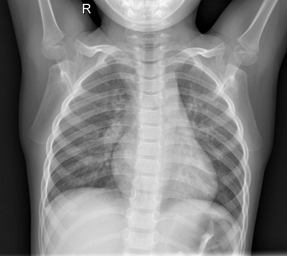

In [66]:
sample_image_resized

In [72]:
sample_image_resized_array = np.asarray(sample_image_resized)

In [75]:
sample_image_resized_array.shape

(256, 287)